In [90]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import holidays

In [91]:
energy_data = pd.read_csv("data/energy_demand_weather_hourly_spain/energy_dataset.csv")

energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [92]:
weather_features = pd.read_csv("data/energy_demand_weather_hourly_spain/weather_features.csv")

weather_features.describe()

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.000000,178396.000000,178396.000000,1.783960e+05,178396.000000,178396.00000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000,178396.000000
mean,289.618605,288.330442,291.091267,1.069261e+03,68.423457,2.47056,166.591190,0.075492,0.000380,0.004763,25.073292,759.831902
std,8.026199,7.955491,8.612454,5.969632e+03,21.902888,2.09591,116.611927,0.398847,0.007288,0.222604,30.774129,108.733223
min,262.240000,262.240000,262.240000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000
25%,283.670000,282.483602,284.650000,1.013000e+03,53.000000,1.00000,55.000000,0.000000,0.000000,0.000000,0.000000,800.000000
50%,289.150000,288.150000,290.150000,1.018000e+03,72.000000,2.00000,177.000000,0.000000,0.000000,0.000000,20.000000,800.000000
75%,295.150000,293.730125,297.150000,1.022000e+03,87.000000,4.00000,270.000000,0.000000,0.000000,0.000000,40.000000,801.000000
max,315.600000,315.150000,321.150000,1.008371e+06,100.000000,133.00000,360.000000,12.000000,2.315000,21.500000,100.000000,804.000000


In [93]:
energy_weather_merged = pd.read_csv("data/energy_demand_weather_hourly_spain/cleaned_energy_weather_merged.csv")
energy_weather_merged.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,Madrid_temp_F,Seville_temp_F,Valencia_temp_F,temp_extreme_cold,temp_extreme_hot,previous_day_load,day_type,hour,hour_sin,hour_cos
count,34957.000000,34957.000000,34957.0,34957.000000,34957.000000,34957.000000,34957.0,34957.0,34957.0,34957.000000,...,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,34957.000000,3.495700e+04,3.495700e+04
mean,383.423206,448.215293,0.0,5623.410304,4254.455417,298.409474,0.0,0.0,0.0,475.674200,...,59.270492,68.067164,63.780335,0.008885,0.030277,28699.438339,0.713591,11.497726,5.453535e-05,5.938700e-04
std,85.290022,354.573151,0.0,2201.724393,1962.156507,52.368864,0.0,0.0,0.0,792.681202,...,16.776493,14.536260,13.002976,0.051812,0.104509,4574.777611,0.452089,6.924687,7.070920e-01,7.071416e-01
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,15.767600,28.220000,24.225181,0.000000,0.000000,18041.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,333.000000,0.000000,0.0,4126.000000,2524.000000,263.000000,0.0,0.0,0.0,0.000000,...,46.400000,57.588800,53.600000,0.000000,0.000000,24809.000000,0.000000,5.000000,-7.071068e-01,-7.071068e-01
50%,367.000000,510.000000,0.0,4971.000000,4470.000000,300.000000,0.0,0.0,0.0,68.000000,...,56.840000,66.776000,62.780000,0.000000,0.000000,28904.000000,1.000000,11.000000,1.224647e-16,6.123234e-17
75%,432.000000,757.000000,0.0,6431.000000,5837.000000,330.000000,0.0,0.0,0.0,615.000000,...,71.330000,78.339200,73.400000,0.000000,0.000000,32194.000000,1.000000,18.000000,7.071068e-01,7.071068e-01
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,4523.000000,...,104.324000,108.410000,100.400000,0.800000,1.000000,41015.000000,1.000000,23.000000,1.000000e+00,1.000000e+00


In [94]:
# The time is provided in spanish timezone CET
energy_data["time"] = pd.to_datetime(energy_data["time"], utc=True).dt.tz_convert('CET')

# Set time as index for easier slicing & analysis
energy_data.set_index("time", inplace=True)

# Convert and set time index for weather_features, similarly as for energy_data
weather_features["dt_iso"] = pd.to_datetime(weather_features["dt_iso"], utc=True).dt.tz_convert('CET')
weather_features.set_index("dt_iso", inplace=True)

energy_weather_merged["time"] = pd.to_datetime(energy_weather_merged["time"], utc=True).dt.tz_convert('CET')
energy_weather_merged.set_index("time", inplace=True)



In [95]:
#energy_weather_merged['2015':'2016']

In [96]:
# Standard scaling on non-binary values
# A commonly used method is Min-Max Scaling (Normalization) which scales the data between 0 and 1. 
# Another method is the Standard Scaler (Standardization) which scales the data based on mean and standard deviation.
# We will use Standard Scalar method here

# One-hot encode season
season_dummies = pd.get_dummies(energy_weather_merged['season'], prefix='season')

# Create a dedicated feature matrix
features = energy_weather_merged.filter(like='_temp_F').columns.tolist() + ['previous_day_load', 'temp_extreme_cold', 'temp_extreme_hot', 'day_type', 'hour_sin', 'hour_cos']
feature_matrix = pd.concat([energy_weather_merged[features], season_dummies], axis=1)

# Scaling using StandardScaler
scaler = StandardScaler()
cols_to_scale = ['previous_day_load'] + feature_matrix.filter(like='_temp_F').columns.tolist()
feature_matrix[cols_to_scale] = scaler.fit_transform(feature_matrix[cols_to_scale])

feature_matrix


,Barcelona_temp_F,Bilbao_temp_F,Madrid_temp_F,Seville_temp_F,Valencia_temp_F,previous_day_load,temp_extreme_cold,temp_extreme_hot,day_type,hour_sin,hour_cos,season_Fall,season_Spring,season_Summer,season_Winter
time,,,,,,,,,,,,,,,
2015-01-02 00:00:00+01:00,-1.055846,-1.910755,-2.271562,-2.062800,-2.710044,-0.724513,0.4,0.0,1,0.000000,1.000000,False,False,False,True
2015-01-02 01:00:00+01:00,-1.055846,-2.053777,-2.271562,-2.062800,-2.710044,-0.943762,0.6,0.0,1,0.258819,0.965926,False,False,False,True
2015-01-02 02:00:00+01:00,-1.191911,-2.019963,-2.350960,-2.089423,-2.788258,-1.304003,0.6,0.0,1,0.500000,0.866025,False,False,False,True
2015-01-02 03:00:00+01:00,-1.191911,-2.118781,-2.350960,-2.089423,-2.788258,-1.620526,0.6,0.0,1,0.707107,0.707107,False,False,False,True
2015-01-02 04:00:00+01:00,-1.191911,-2.114022,-2.350960,-2.089423,-2.788258,-1.843928,0.6,0.0,1,0.866025,0.500000,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,-0.854946,-0.765388,-0.508605,-0.672064,-0.715103,0.114010,0.0,0.0,1,-0.965926,0.258819,False,False,False,True
2018-12-31 20:00:00+01:00,-1.076516,-0.978710,-0.877698,-0.919725,-1.061183,0.293475,0.0,0.0,1,-0.866025,0.500000,False,False,False,True
2018-12-31 21:00:00+01:00,-1.150869,-1.370045,-1.089069,-0.995261,-1.266062,0.334351,0.0,0.0,1,-0.707107,0.707107,False,False,False,True


In [97]:
# Target vector
y = energy_weather_merged['total load actual']

In [98]:
# Benchmarking vector
benchmark = energy_weather_merged['total load forecast']

In [99]:
# Generating NEW extreme cold/hot columns
extreme_cold_threshold_v2 = 50 #20
extreme_hot_threshold_v2 = 90 #102

cities = ['Madrid', 'Seville', ' Barcelona', 'Bilbao', 'Valencia']

energy_weather_merged['temp_extreme_cold_v2'] = energy_weather_merged[[f'{city}_temp_F' for city in cities]].apply(lambda row: sum(1 for temp in row if temp < extreme_cold_threshold_v2)/len(cities), axis=1)
energy_weather_merged['temp_extreme_hot_v2'] = energy_weather_merged[[f'{city}_temp_F' for city in cities]].apply(lambda row: sum(1 for temp in row if temp > extreme_hot_threshold_v2)/len(cities), axis=1)


In [100]:
# Include the new 'previous_day_load_XX' columns to the list of features for the new matrix
# Removing 'previous_day_load' as it can be deduced by the other 'previous_day_load_XX' columns
features_v2 = energy_weather_merged.filter(like='_temp_F').columns.tolist() + \
              ['previous_day_load','day_type', 'hour_sin', 'hour_cos', 'temp_extreme_hot', 'temp_extreme_cold']
# 'previous_day_load_fossilfuels', 'previous_day_load_hydro', 'previous_day_load_windsolar', 'previous_day_load_nuclear_other'

feature_matrix_v2 = pd.concat([energy_weather_merged[features_v2], season_dummies], axis=1)

# Scaling using StandardScaler
# Update cols_to_scale to include new 'previous_day_load_XX' columns
cols_to_scale = ['previous_day_load'] + \
                 feature_matrix_v2.filter(like='_temp_F').columns.tolist()

feature_matrix_v2[cols_to_scale] = scaler.fit_transform(feature_matrix_v2[cols_to_scale])

feature_matrix_v2

,Barcelona_temp_F,Bilbao_temp_F,Madrid_temp_F,Seville_temp_F,Valencia_temp_F,previous_day_load,day_type,hour_sin,hour_cos,temp_extreme_hot,temp_extreme_cold,season_Fall,season_Spring,season_Summer,season_Winter
time,,,,,,,,,,,,,,,
2015-01-02 00:00:00+01:00,-1.055846,-1.910755,-2.271562,-2.062800,-2.710044,-0.724513,1,0.000000,1.000000,0.0,0.4,False,False,False,True
2015-01-02 01:00:00+01:00,-1.055846,-2.053777,-2.271562,-2.062800,-2.710044,-0.943762,1,0.258819,0.965926,0.0,0.6,False,False,False,True
2015-01-02 02:00:00+01:00,-1.191911,-2.019963,-2.350960,-2.089423,-2.788258,-1.304003,1,0.500000,0.866025,0.0,0.6,False,False,False,True
2015-01-02 03:00:00+01:00,-1.191911,-2.118781,-2.350960,-2.089423,-2.788258,-1.620526,1,0.707107,0.707107,0.0,0.6,False,False,False,True
2015-01-02 04:00:00+01:00,-1.191911,-2.114022,-2.350960,-2.089423,-2.788258,-1.843928,1,0.866025,0.500000,0.0,0.6,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,-0.854946,-0.765388,-0.508605,-0.672064,-0.715103,0.114010,1,-0.965926,0.258819,0.0,0.0,False,False,False,True
2018-12-31 20:00:00+01:00,-1.076516,-0.978710,-0.877698,-0.919725,-1.061183,0.293475,1,-0.866025,0.500000,0.0,0.0,False,False,False,True
2018-12-31 21:00:00+01:00,-1.150869,-1.370045,-1.089069,-0.995261,-1.266062,0.334351,1,-0.707107,0.707107,0.0,0.0,False,False,False,True


In [101]:
feature_matrix.columns

Index([' Barcelona_temp_F', 'Bilbao_temp_F', 'Madrid_temp_F', 'Seville_temp_F',
       'Valencia_temp_F', 'previous_day_load', 'temp_extreme_cold',
       'temp_extreme_hot', 'day_type', 'hour_sin', 'hour_cos', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [102]:
feature_matrix_v2.columns

Index([' Barcelona_temp_F', 'Bilbao_temp_F', 'Madrid_temp_F', 'Seville_temp_F',
       'Valencia_temp_F', 'previous_day_load', 'day_type', 'hour_sin',
       'hour_cos', 'temp_extreme_hot', 'temp_extreme_cold', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')

In [103]:
# Create a list of holidays in Spain
spain_holidays = holidays.Spain(years=[2015, 2016, 2017, 2018])  

# Define a function to check for holidays and scale the feature
def get_holiday_feature(date):
    if date in spain_holidays:
        return 1  # It's a holiday
    else:
        return 0  # It's not a holiday

# If the dates are the index of the DataFrame, you can use map like this:
feature_matrix_v2['holiday_feature'] = feature_matrix_v2.index.map(get_holiday_feature)

# Now let's create feature_matrix_v3 with the new holiday feature
feature_matrix_v3 = feature_matrix_v2.copy()

feature_matrix_v3

,Barcelona_temp_F,Bilbao_temp_F,Madrid_temp_F,Seville_temp_F,Valencia_temp_F,previous_day_load,day_type,hour_sin,hour_cos,temp_extreme_hot,temp_extreme_cold,season_Fall,season_Spring,season_Summer,season_Winter,holiday_feature
time,,,,,,,,,,,,,,,,
2015-01-02 00:00:00+01:00,-1.055846,-1.910755,-2.271562,-2.062800,-2.710044,-0.724513,1,0.000000,1.000000,0.0,0.4,False,False,False,True,0
2015-01-02 01:00:00+01:00,-1.055846,-2.053777,-2.271562,-2.062800,-2.710044,-0.943762,1,0.258819,0.965926,0.0,0.6,False,False,False,True,0
2015-01-02 02:00:00+01:00,-1.191911,-2.019963,-2.350960,-2.089423,-2.788258,-1.304003,1,0.500000,0.866025,0.0,0.6,False,False,False,True,0
2015-01-02 03:00:00+01:00,-1.191911,-2.118781,-2.350960,-2.089423,-2.788258,-1.620526,1,0.707107,0.707107,0.0,0.6,False,False,False,True,0
2015-01-02 04:00:00+01:00,-1.191911,-2.114022,-2.350960,-2.089423,-2.788258,-1.843928,1,0.866025,0.500000,0.0,0.6,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00+01:00,-0.854946,-0.765388,-0.508605,-0.672064,-0.715103,0.114010,1,-0.965926,0.258819,0.0,0.0,False,False,False,True,0
2018-12-31 20:00:00+01:00,-1.076516,-0.978710,-0.877698,-0.919725,-1.061183,0.293475,1,-0.866025,0.500000,0.0,0.0,False,False,False,True,0
2018-12-31 21:00:00+01:00,-1.150869,-1.370045,-1.089069,-0.995261,-1.266062,0.334351,1,-0.707107,0.707107,0.0,0.0,False,False,False,True,0


In [104]:
# Since this is timeseries forecasting, the train_test_split() function could impose data leakage, where future time stamps are being 
# used to predict the future

train_size = int(len(feature_matrix_v3) * 0.8)
X_train, X_test = feature_matrix_v3[:train_size], feature_matrix_v3[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize TimeSeriesSplit Cross Validation with 5 splits
tscv = TimeSeriesSplit(n_splits=5)

In [105]:
# List of 'k' values to test
# Knowing that k=50 worked well last time, we build around that
k_values = [10, 20, 30, 40, 45, 50, 55, 60]
rmse_values = []

for k in k_values:
    # Temporary list to store RMSE for each cross-validation fold
    temp_rmse = []

    # Initialize the model with the current 'k' value
    knn = KNeighborsRegressor(n_neighbors=k)

    for train_idx, val_idx in tscv.split(X_train):
        # Split the data into training and validation sets
        CV_X_train, CV_X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        CV_y_train, CV_y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train the model on the training data
        knn.fit(CV_X_train, CV_y_train)

        # Predict on the validation set
        y_pred = knn.predict(CV_X_val)

        # Calculate the RMSE for the current fold and append to temporary list
        fold_rmse = mean_squared_error(CV_y_val, y_pred, squared=False)
        temp_rmse.append(fold_rmse)

    # Calculate the average RMSE for this value of 'k' and append to the main RMSE list
    avg_knn_rmse = np.mean(temp_rmse)
    rmse_values.append(avg_knn_rmse)

    print(f"n_neighbors: {k} -> Average RMSE: {round(avg_knn_rmse,2)}")

n_neighbors: 10 -> Average RMSE: 2795.23
n_neighbors: 20 -> Average RMSE: 2705.04
n_neighbors: 30 -> Average RMSE: 2678.57
n_neighbors: 40 -> Average RMSE: 2669.02
n_neighbors: 45 -> Average RMSE: 2668.53
n_neighbors: 50 -> Average RMSE: 2667.87
n_neighbors: 55 -> Average RMSE: 2669.18
n_neighbors: 60 -> Average RMSE: 2671.57


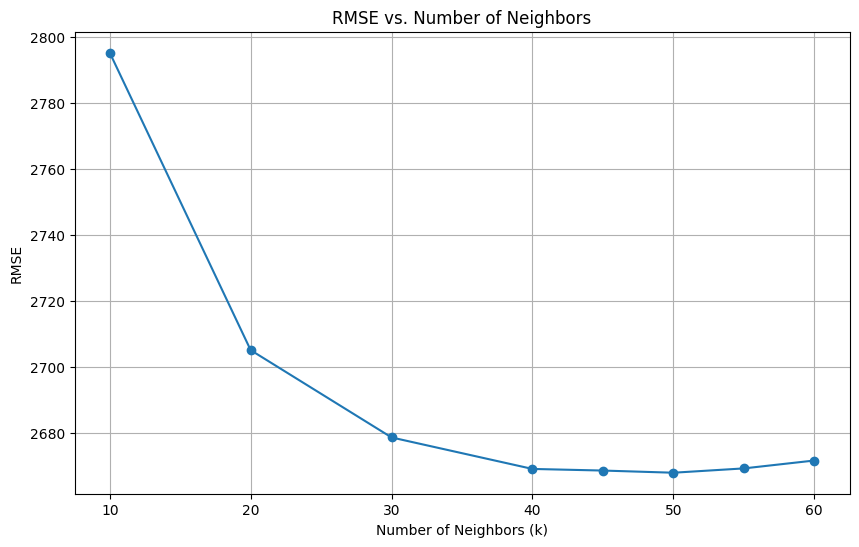

In [106]:
# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("RMSE")
plt.title("RMSE vs. Number of Neighbors")
plt.grid(True)
plt.show()



In [107]:
# Calculate the final MAE and RMSE for KNN
# Initialize the model with the best 'k' value -- 50 -- found from previous experiments
knn = KNeighborsRegressor(n_neighbors=50)

# Train the model on the entire training set
knn.fit(X_train, y_train)

# Predict future values on the entire test set
knn_y_pred = knn.predict(X_test)

# Calculate RMSE for the current 'k' value
knn_rmse = mean_squared_error(y_test, knn_y_pred, squared=False)

knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_rmse = mean_squared_error(y_test, knn_y_pred, squared=False)

print(f"MAE: {round(knn_mae,2)}")
print(f"RMSE: {round(knn_rmse,2)}")

MAE: 1798.85
RMSE: 2538.92


In [108]:
# Match the benchmark indices with the y_test indices
benchmark_test = benchmark[y_test.index]

# Calculate the benchmark rmse relative to y_test
benchmark_rmse = np.sqrt(mean_squared_error(y_test, benchmark_test))

In [109]:
print(f"My KNN Model RMSE: {round(knn_rmse,2)}")
print(f"Benchmark RMSE: {round(benchmark_rmse,2)}\n")

print(f"My kNN model's average error (RMSE) is around {round(knn_rmse/benchmark.describe()['mean']*100,2)}% of the mean load value.")
print(f"The benchmark's average error is around {round(benchmark_rmse/benchmark.describe()['mean']*100,2)}% of the mean load value.")

My KNN Model RMSE: 2538.92
Benchmark RMSE: 378.28

My kNN model's average error (RMSE) is around 8.84% of the mean load value.
The benchmark's average error is around 1.32% of the mean load value.


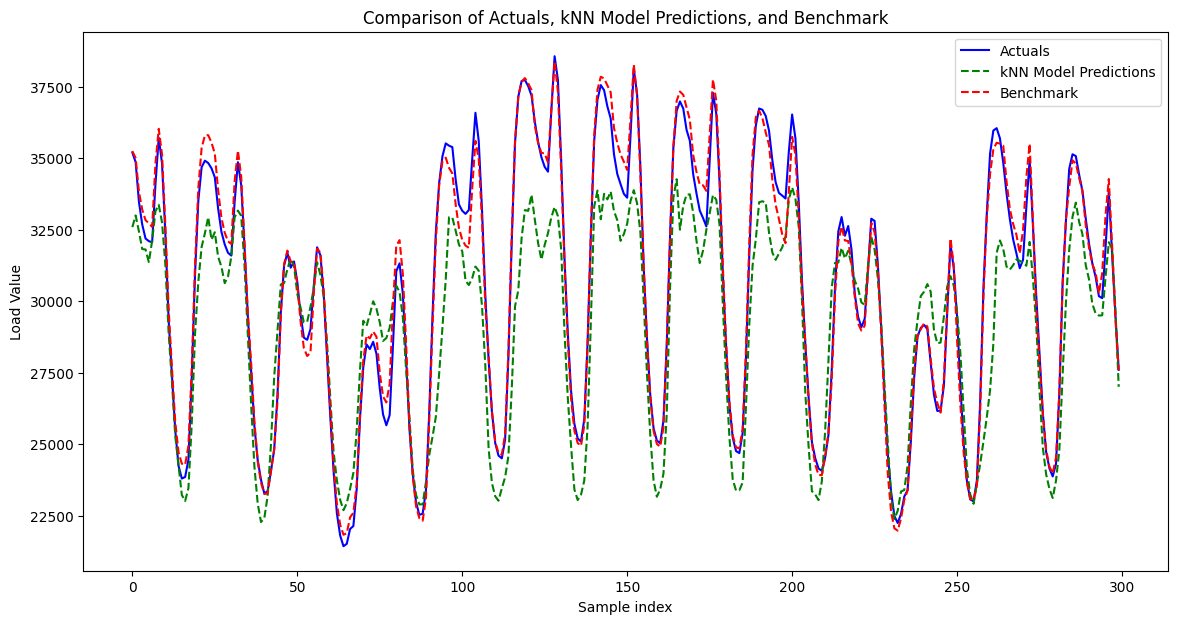

In [110]:
# Sample for visualization (e.g., 200 points)
sample_size = 300
indices = range(sample_size)

plt.figure(figsize=(14, 7))

# Plot actuals
plt.plot(indices, y_test[:sample_size], label="Actuals", color="blue")

# Plot model predictions
plt.plot(indices, knn_y_pred[:sample_size], label="kNN Model Predictions", color="green", linestyle="--")

# Plot benchmark
plt.plot(indices, benchmark_test[:sample_size], label="Benchmark", color="red", linestyle="--")

plt.title("Comparison of Actuals, kNN Model Predictions, and Benchmark")
plt.xlabel("Sample index")
plt.ylabel("Load Value")
plt.legend()
plt.show()
